In [43]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [44]:
x =np.linspace(0,1,20)
y =np.linspace(0,1,20)

h = x[1]-x[0]
print(h)

0.05263157894736842


In [45]:
rq = [0.51,0.2]

In [46]:
def Potencial(x,y):
    return 1./np.sqrt( (x-rq[0])**2 + (y-rq[1])**2 ) - 1./np.sqrt( (x-rq[0])**2 + (y+rq[1])**2 )

In [47]:
X,Y = np.meshgrid(x,y)
V = Potencial(X,Y)

<IPython.core.display.Javascript object>


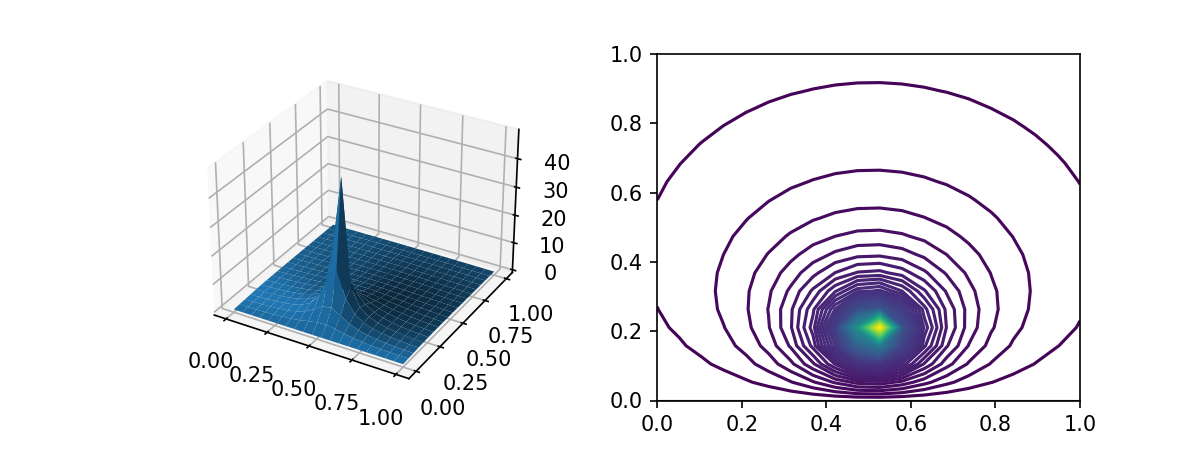

In [48]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,2,1,projection='3d')
ax1 = fig.add_subplot(1,2,2)

ax.plot_surface(X,Y,V)
ax1.contour(X,Y,V,100)

In [49]:
def Dx(f,x,y,h):
    return (f(x+h,y)-f(x-h,y))/(2*h)
def Dy(f,x,y,h):
    return (f(x,y+h)-f(x,y-h))/(2*h)

In [50]:
# mas elegante
PartialOperator = (lambda f,x,y,h : (f(x+h,y)-f(x-h,y))/(2*h),\
           lambda f,x,y,h: (f(x,y+h)-f(x,y-h))/(2*h))

In [51]:
PartialOperator[0](Potencial,0,1,h)

0.3661397309534773

In [52]:
#Ex = np.zeros((N,N))
#Ey = np.zeros((N,N))

#for i in range(N):
#    for j in range(N):
#        Ex[i,j] = -Dx(Potencial,x[i],y[j],h)
#        Ey[i,j] = -Dy(Potencial,x[i],y[j],h)

Ex = -PartialOperator[0](Potencial,X,Y,h)
Ey = -PartialOperator[1](Potencial,X,Y,h)

# Por la manera es que se pinta

Ex = Ex.T
Ey = Ey.T

<IPython.core.display.Javascript object>


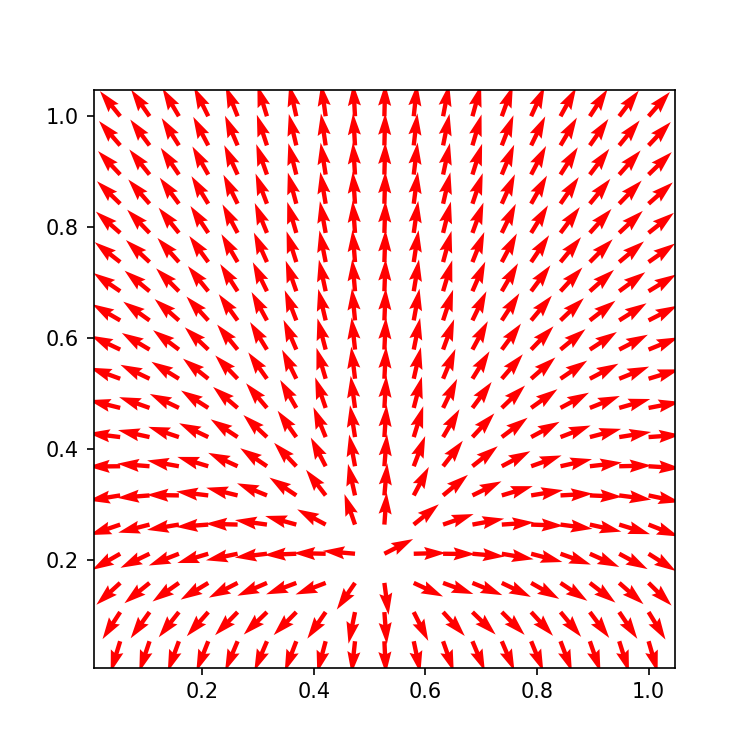

In [53]:
fig1 = plt.figure(figsize=(5,5))
ax = fig1.add_subplot(1,1,1)

for i in range(1,len(x)):
    for j in range(1,len(y)):
        ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j],color='r')